In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family':'sans-serif'})
plt.rcParams.update({'font.sans-serif':['Helvetica']})
plt.rcParams.update({'axes.titlesize':'medium'})

savefig_params = {"dpi": 300,
                  "bbox_inches": "tight"}

In [2]:
def init_plot():
    """Generate a square 2x2 plot containing a circle of radius 1.0
    
    Args:
        None
        
    Returns:
        None
    
    """
    plt.axes()
    
    circle = plt.Circle((0,0),radius=1.0,
                        fc='white', ec="green")
    plt.gca().add_patch(circle)
    plt.axis('scaled')
    plt.xlim(-1.0, 1.0)
    plt.ylim(-1.0, 1.0)
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")

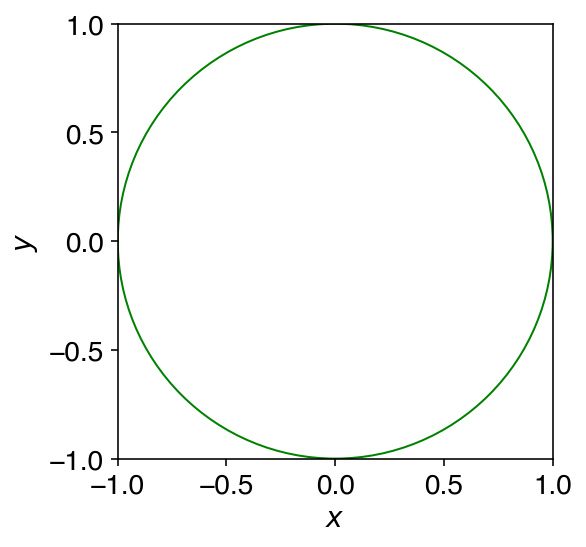

In [3]:
init_plot()
plt.savefig('figures/unit_circle.pdf', **savefig_params)
plt.show()

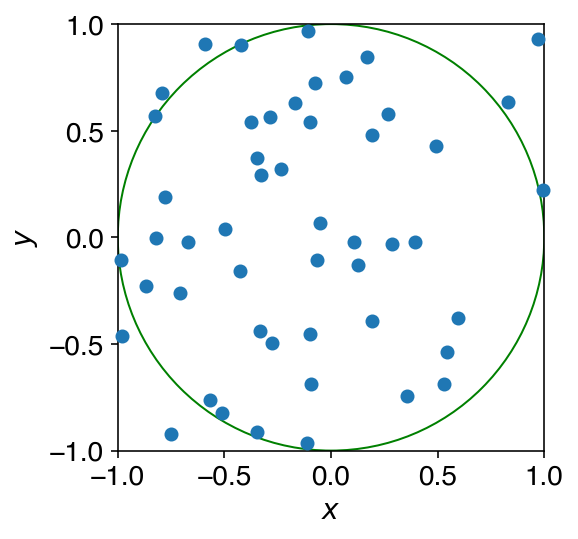

In [4]:
init_plot()
x_random = np.random.uniform(low=-1.0, high=1.0, size=(50,))
y_random = np.random.uniform(low=-1.0, high=1.0, size=(50,))
plt.plot(x_random, y_random, 'o', clip_on=False, zorder=10)
plt.tight_layout()
plt.savefig('figures/random_xy_example.pdf', **savefig_params)
plt.show()

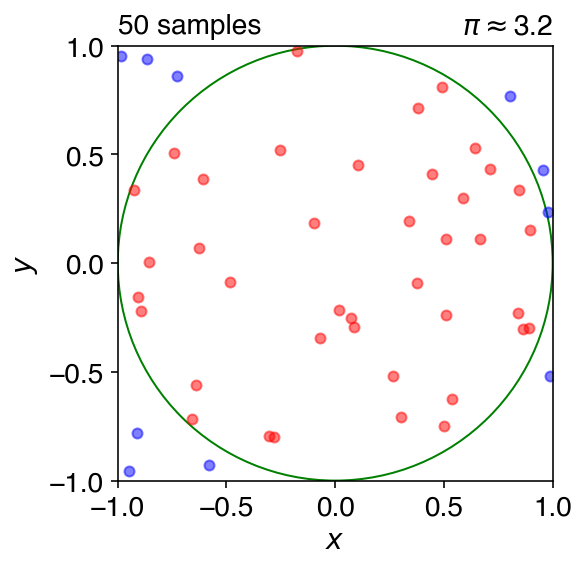

In [5]:
init_plot()
r = 1.0
n_samples = 50
x_random = np.random.uniform(low=-1.0, high=1.0, size=(n_samples))
y_random = np.random.uniform(low=-1.0, high=1.0, size=(n_samples))
n_inside = 0
for x, y in zip(x_random, y_random):
    if x**2 + y**2 < r**2:
        plt.plot(x, y, 'o', color='red', alpha=0.5, markersize=5)
        n_inside += 1
    else:
        plt.plot(x, y, 'o', color='blue', alpha=0.5, markersize=5)
pi_estimate = n_inside / n_samples * 4.0
plt.title(r"$\pi \approx $" + f"{pi_estimate}", loc="right")
plt.title("50 samples", loc="left")
plt.savefig('figures/50_point_estimate.pdf', **savefig_params)
plt.show()

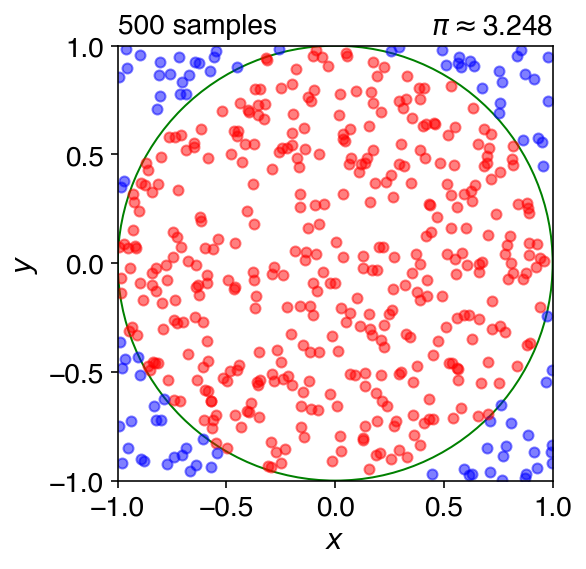

In [6]:
r = 1.0
init_plot()
n_samples = 500
x_random = np.random.uniform(low=-1.0, high=1.0, size=(n_samples))
y_random = np.random.uniform(low=-1.0, high=1.0, size=(n_samples))
n_inside = 0
for x, y in zip(x_random, y_random):
    if x**2 + y**2 < r**2:
        plt.plot(x, y, 'o', color='red', alpha=0.5, markersize=5)
        n_inside += 1
    else:
        plt.plot(x, y, 'o', color='blue', alpha=0.5, markersize=5)
pi_estimate = n_inside / n_samples * 4.0
plt.title(r"$\pi \approx $" + f"{pi_estimate}", loc="right")
plt.title("500 samples", loc="left")
plt.savefig('figures/500_point_estimate.pdf', **savefig_params)
plt.show()
plt.show()

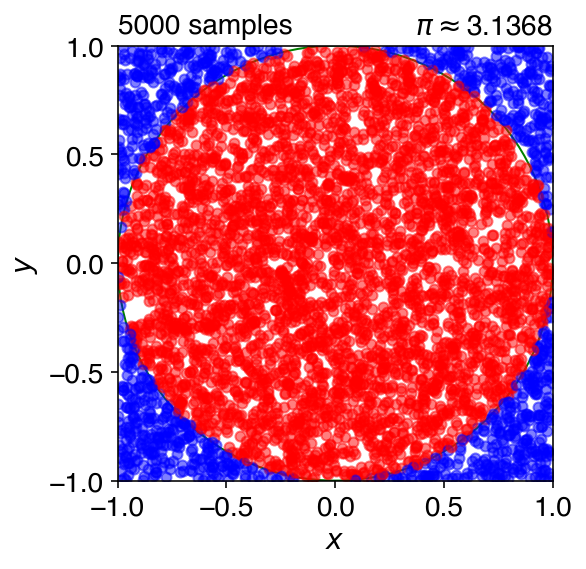

In [7]:
r = 1.0
init_plot()
n_samples = 5000
x_random = np.random.uniform(low=-1.0, high=1.0, size=(n_samples))
y_random = np.random.uniform(low=-1.0, high=1.0, size=(n_samples))
n_inside = 0
for x, y in zip(x_random, y_random):
    if x**2 + y**2 < r**2:
        plt.plot(x, y, 'o', color='red', alpha=0.5, markersize=5)
        n_inside += 1
    else:
        plt.plot(x, y, 'o', color='blue', alpha=0.5, markersize=5)
pi_estimate = n_inside / n_samples * 4.0
plt.title(r"$\pi \approx $" + f"{pi_estimate}", loc="right")
plt.title("5000 samples", loc="left")
plt.savefig('figures/5000_point_estimate.pdf', **savefig_params)
plt.show()
plt.show()

100%|███████████████████████████████████████████████████████████████████| 50000/50000 [00:09<00:00, 5299.64it/s]


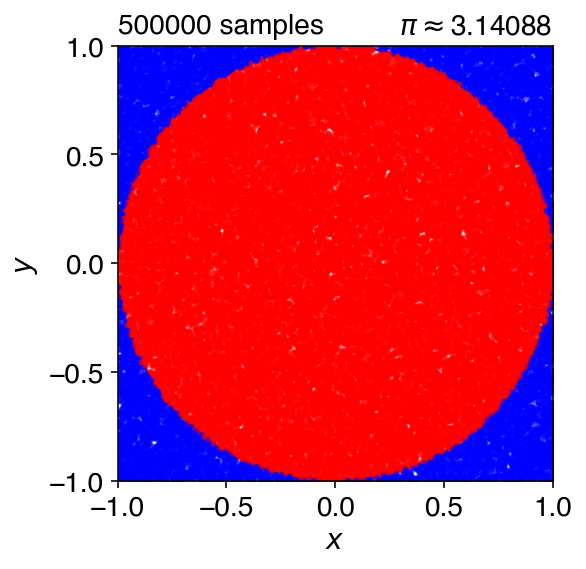

In [11]:
r = 1.0
init_plot()
n_samples = 50000
x_random = np.random.uniform(low=-1.0, high=1.0, size=(n_samples))
y_random = np.random.uniform(low=-1.0, high=1.0, size=(n_samples))
n_inside = 0
pi_est = []
n_sampled = 0
for x, y in tqdm(zip(x_random, y_random), total=n_samples):
    if x**2 + y**2 < r**2:
        plt.plot(x, y, 'o', color='red', alpha=0.5, markersize=2)
        n_inside += 1
    else:
        plt.plot(x, y, 'o', color='blue', alpha=0.5, markersize=2)
    n_sampled += 1
    pi_est.append(n_inside / n_sampled * 4.0)
pi_estimate = n_inside / n_samples * 4.0
plt.title(r"$\pi \approx $" + f"{pi_estimate}", loc="right")
plt.title("500000 samples", loc="left")
plt.savefig('figures/50000_point_estimate.pdf', **savefig_params)
plt.show()

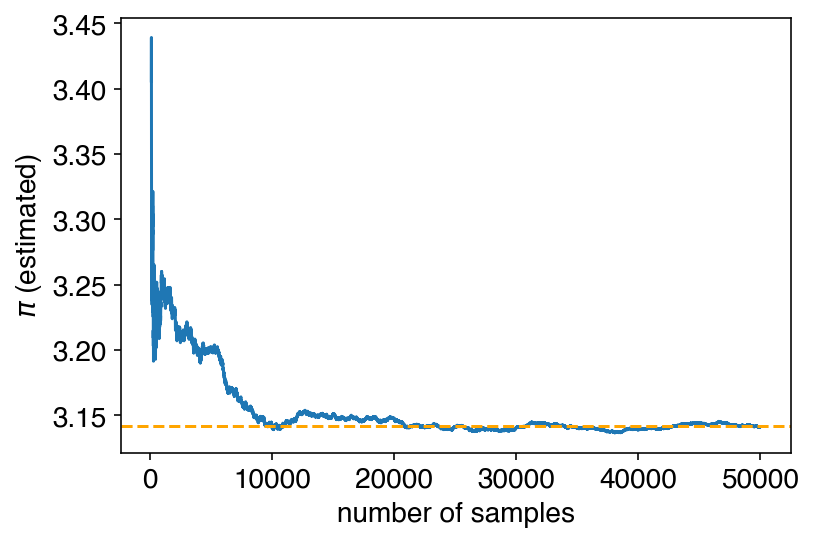

In [12]:
x_min = 100
x_max = n_samples
plt.plot(np.arange(x_min, x_max), pi_est[x_min:])
plt.xlabel("number of samples")
plt.ylabel(r'$\pi$ (estimated)')
plt.axhline(np.pi, linestyle='--', color="orange")
plt.savefig("figures/pi_estimate_convergence.pdf", **savefig_params)
plt.show()

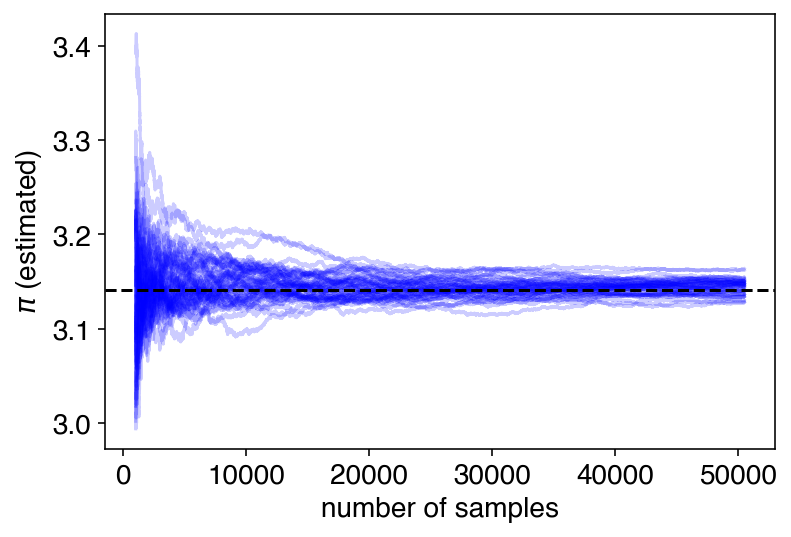

In [13]:
r = 1.0

n_samples = 50000
pi_est_multiples = []
for i in range(50):
    pi_est = []
    x_random = np.random.uniform(low=-1.0, high=1.0, size=(n_samples))
    y_random = np.random.uniform(low=-1.0, high=1.0, size=(n_samples))
    n_inside = 0
    n_sampled = 0
    for x, y in zip(x_random, y_random):
        if x**2 + y**2 < r**2:
            n_inside += 1
        n_sampled += 1
        pi_est.append(n_inside / n_sampled * 4.0)
    x_min = 500
    x_max = n_samples
    plt.plot(np.arange(x_min, x_max)+x_min, pi_est[x_min:], alpha=0.2, color="blue")
    pi_est_multiples.append(pi_est)
plt.xlabel("number of samples")
plt.ylabel(r'$\pi$ (estimated)')
plt.axhline(np.pi, linestyle='--', color="black")
plt.savefig("figures/pi_estimated_multiples.pdf", **savefig_params)
plt.show()

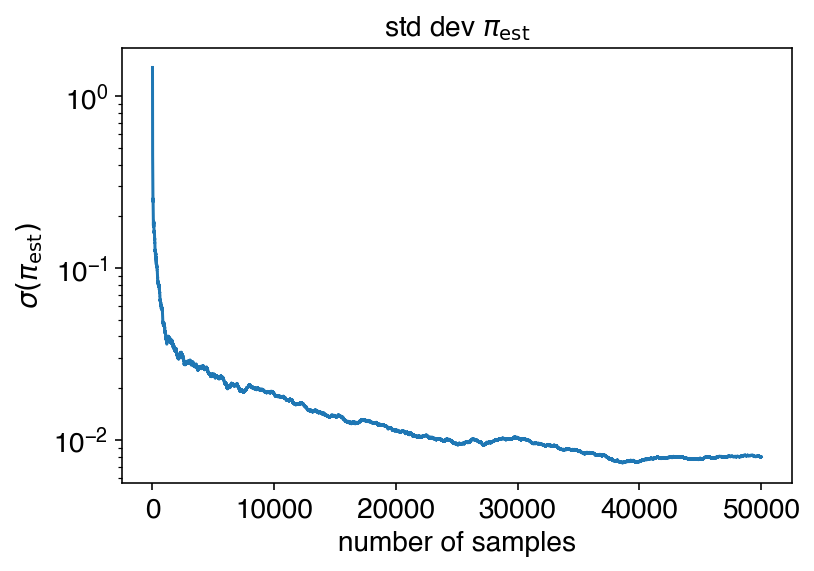

In [14]:
pi_est_multiples = np.array(pi_est_multiples)
plt.semilogy(pi_est_multiples.std(axis=0))
plt.xlabel("number of samples")
plt.ylabel(r"$\sigma(\pi_\mathrm{est})$")
plt.title(r"std dev $\pi_\mathrm{est}$")
plt.savefig("figures/pi_estimated_std_error.pdf", **savefig_params)
plt.show()